## Sequence dataset generation

### Reading data

Reading pre-processed Uniprot data for all organisms:

In [34]:
from subpred.util import load_df

sequences = load_df("uniprot")
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


### Selecting organism

Filtering for *E. Coli* Strain K12: 

In [35]:
sequences = sequences[sequences.organism_id == 83333]
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...,83333


### Filtering

Keeping proteins that have been manually reviewed, or have sequence evidence at protein level:

In [36]:
sequences = sequences[(sequences.protein_existence == 1) | (sequences.reviewed)]
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Sequence clustering the proteins:

The clustering at 70% sequence identity does not remove a lot of proteins for *E. coli*. This is different for other organisms. 

In [37]:
from subpred.cdhit import cd_hit

clusters = cd_hit(sequences=sequences.sequence, identity_threshold=70)
sequences = sequences.loc[clusters]
sequences


cd-hit: clustered 3277 sequences into 3236 clusters at threshold 70


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Filtering for transmembrane transporters using GO

#### Loading all GO Uniprot annotations

Read pre-processed Uniprot GO annotations:

In [38]:
go_annotations_uniprot = load_df("go")
go_annotations_uniprot


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


#### Dataset of transmembrane transport GO terms in E Coli

- Used to filter proteins for transmembrane transporters

**Creating dataset of transporter GO term annotations**

Filter for GO terms that are descendants of "transmembrane transporter activity

GO annotations for the clustered sequence dataset from *E Coli.*

In [39]:
from subpred.ontology import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)
transmembrane_transport_go_terms = go_owl.get_descendants(
    go_owl.get_identifier("transmembrane transporter activity")
)
# filter GO annotations for descendants of transmembrane transporter activity
go_annotations_tmtp = go_annotations_uniprot[
    go_annotations_uniprot.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A014M993,enables,GO:0015288,IEA,F
1,A0A014M993,enables,GO:0015481,IEA,F
2,A0A014M993,enables,GO:0042958,IEA,F
3,A0A022PEV8,enables,GO:0015288,IEA,F
4,A0A022PEV8,enables,GO:0015481,IEA,F
...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F
94156,Z4YKJ7,enables,GO:0015172,IEA,F
94157,Z4YKJ7,enables,GO:0015179,IEA,F
94158,Z4YKJ7,enables,GO:0015293,IEA,F


In [40]:
# add ancestors of all remaining terms
go_annotations_tmtp = go_annotations_tmtp.assign(
    ancestors=go_annotations_tmtp.go_id.transform(
        lambda go_id: go_owl.get_ancestors(go_id)
    )
)
assert go_annotations_tmtp.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect,ancestors
0,A0A014M993,enables,GO:0015288,IEA,F,"{GO:0005215, GO:0022803, GO:0022829, GO:002285..."
1,A0A014M993,enables,GO:0015481,IEA,F,"{GO:0015144, GO:0015154, GO:0005215, GO:001528..."
2,A0A014M993,enables,GO:0042958,IEA,F,"{GO:0015144, GO:0042958, GO:0005215, GO:001515..."
3,A0A022PEV8,enables,GO:0015288,IEA,F,"{GO:0005215, GO:0022803, GO:0022829, GO:002285..."
4,A0A022PEV8,enables,GO:0015481,IEA,F,"{GO:0015144, GO:0015154, GO:0005215, GO:001528..."
...,...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F,"{GO:0022857, GO:0003674, GO:0005215}"
94156,Z4YKJ7,enables,GO:0015172,IEA,F,"{GO:0015171, GO:0005215, GO:0005342, GO:004694..."
94157,Z4YKJ7,enables,GO:0015179,IEA,F,"{GO:0015171, GO:0005215, GO:0005342, GO:001517..."
94158,Z4YKJ7,enables,GO:0015293,IEA,F,"{GO:0005215, GO:0015293, GO:0015291, GO:002280..."


In [41]:
# add ancestor annotations
go_annotations_tmtp = (
    go_annotations_tmtp.drop("go_id", axis=1)
    .rename(columns={"ancestors": "go_id"})
    .explode("go_id")
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0005215
0,A0A014M993,enables,IEA,F,GO:0022803
0,A0A014M993,enables,IEA,F,GO:0022829
0,A0A014M993,enables,IEA,F,GO:0022857
0,A0A014M993,enables,IEA,F,GO:0015288
...,...,...,...,...,...
94159,Z4YKJ7,enables,IEA,F,GO:0015081
94159,Z4YKJ7,enables,IEA,F,GO:0008514
94159,Z4YKJ7,enables,IEA,F,GO:0015293
94159,Z4YKJ7,enables,IEA,F,GO:0022804


In [42]:
# filter GO annotations and their ancestors for descendants of transmembrane transporter activity again
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp = go_annotations_tmtp.drop_duplicates().reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0022803
1,A0A014M993,enables,IEA,F,GO:0022829
2,A0A014M993,enables,IEA,F,GO:0022857
3,A0A014M993,enables,IEA,F,GO:0015288
4,A0A014M993,enables,IEA,F,GO:0015267
...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015318
581848,Z4YKJ7,enables,IEA,F,GO:0015075
581849,Z4YKJ7,enables,IEA,F,GO:0015081
581850,Z4YKJ7,enables,IEA,F,GO:0008514


In [43]:
# annotate with labels
go_annotations_tmtp = go_annotations_tmtp.assign(
    go_term=go_annotations_tmtp.go_id.transform(go_owl.get_label)
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
1,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,IEA,F,GO:0015288,porin activity
4,A0A014M993,enables,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015318,inorganic molecular entity transmembrane trans...
581848,Z4YKJ7,enables,IEA,F,GO:0015075,ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0008514,organic anion transmembrane transporter activity


In [44]:
# Filtering for qualifier. How many samples do we lose?
print(
    f"Percentage of transmembrane transporter annotations with enables qualifier: {go_annotations_tmtp[go_annotations_tmtp.qualifier == 'enables'].shape[0] / go_annotations_tmtp.shape[0] * 100:.3f}%"
)
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.qualifier == "enables"]
go_annotations_tmtp


Percentage of transmembrane transporter annotations with enables qualifier: 97.408%


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
1,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,IEA,F,GO:0015288,porin activity
4,A0A014M993,enables,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015318,inorganic molecular entity transmembrane trans...
581848,Z4YKJ7,enables,IEA,F,GO:0015075,ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0008514,organic anion transmembrane transporter activity


Before filtering for the electronically inferred IEA annotations, we will only keep annotations for the clustered *E. coli* sequence dataset above, to see what the actual difference in sample count is. *E. coli* is a model organism, and therefore there should be more experimentally verified annotations compared to the thousands of other organisms in the dataset with similar proteins. 

The percentage of IEA annotations in *E. coli* should be much lower than for the average Uniprot organism.

In [45]:
assert not sequences.duplicated().any()
f"% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: {sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)].shape[0]/sequences.shape[0]*100:.2f}%"


'% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: 14.52%'

In [46]:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.Uniprot.isin(sequences.index)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0015318,inorganic molecular entity transmembrane trans...
1,A5A627,enables,IDA,F,GO:0022803,passive transmembrane transporter activity
2,A5A627,enables,IDA,F,GO:0008509,anion transmembrane transporter activity
3,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
4,A5A627,enables,IDA,F,GO:0005253,anion channel activity
...,...,...,...,...,...,...
7374,Q6BEX0,enables,IEA,F,GO:0015407,ABC-type monosaccharide transporter activity
7375,Q6BEX0,enables,IEA,F,GO:0022804,active transmembrane transporter activity
7376,Q6BEX0,enables,IEA,F,GO:0022857,transmembrane transporter activity
7377,Q6BEX0,enables,IEA,F,GO:0103116,ABC-type D-galactofuranose transporter


<AxesSubplot:>

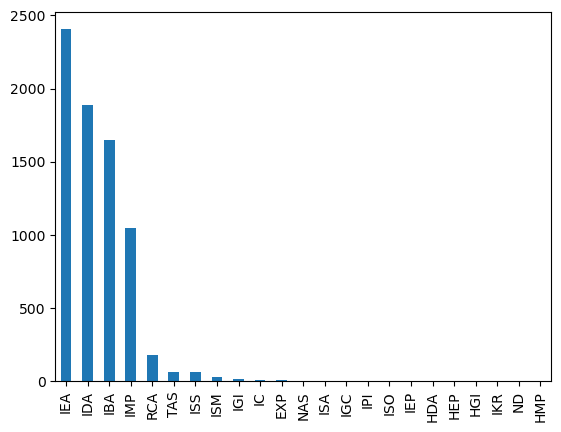

In [47]:
# filter for evidence code. how many samples do we lose?
go_annotations_tmtp.evidence_code.value_counts().plot.bar()


Most annotations have experimental evidence!

<AxesSubplot:>

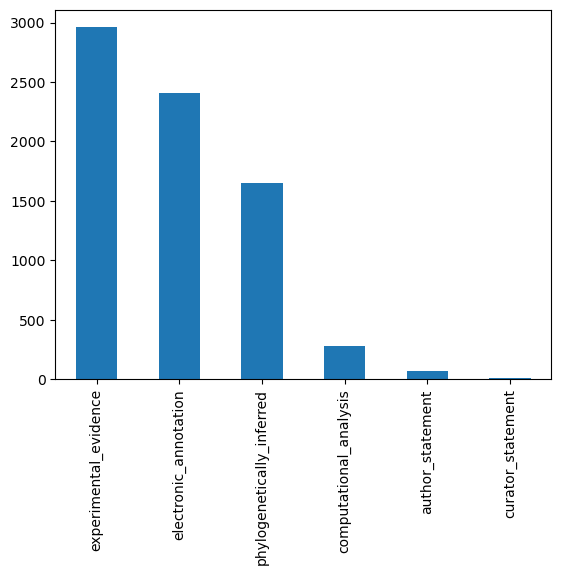

In [48]:
from subpred.ontology import EVIDENCE_CODE_TO_DESCRIPTION

go_annotations_tmtp.evidence_code.map(
    EVIDENCE_CODE_TO_DESCRIPTION
).value_counts().plot.bar()


Another point is that the GO annotation dataset also contains Uniprot annotations assigned by InterPro. There can be cases where the same annotation is in the dataset twice, where one of those annotations has an IEA annotation while the other one does not. What is the actual difference?

In [49]:
tmp = (
    go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"]
    .drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"Without IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)
tmp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"With IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)


Without IEA terms: 3348 annotations in 357 proteins.
With IEA terms: 4172 annotations in 470 proteins.


For now, we will filter out the IEA terms and only keep the verified data.

In [50]:
# filter for evidence codes:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.evidence_code != "IEA"
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0015318,inorganic molecular entity transmembrane trans...
1,A5A627,enables,IDA,F,GO:0022803,passive transmembrane transporter activity
2,A5A627,enables,IDA,F,GO:0008509,anion transmembrane transporter activity
3,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
4,A5A627,enables,IDA,F,GO:0005253,anion channel activity
...,...,...,...,...,...,...
4969,Q59385,enables,IBA,F,GO:0019829,ATPase-coupled cation transmembrane transporte...
4970,Q59385,enables,IBA,F,GO:0140358,P-type transmembrane transporter activity
4971,Q59385,enables,IBA,F,GO:0042626,ATPase-coupled transmembrane transporter activity
4972,Q59385,enables,IBA,F,GO:0046915,transition metal ion transmembrane transporter...


Now, there are still some annotations left with identical uniprot accession and go term, but different evidence codes. This happens because the GO dataset contains annotations made both by Uniprot and by InterPro, and they can assign different evidence codes. The next step is to remove the columns that we no longer need, and delete duplicates:

In [51]:
go_annotations_tmtp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)


In [52]:
# make backup of entire (filtered) genome, since we need a reference set later for the annotations
sequences_all = sequences.copy()
sequences = sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)]
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


#### 

## Feature generation

Here, we will use PSSM and protein embeddings features to encode the protein sequences into vectors of length *n*.

### ProtNLM

One of the most reliable features at the moment seems to be ProtNLM, which provides NLP embeddings for individual proteins. Swissprot has pre-calculated embeddings for all *E. Coli* proteins available for download. 

There is also ProtT5, which can be calcualted for new proteins.

In [53]:
import h5py
import pandas as pd
import numpy as np


def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


feature_protnlm = read_uniprot_embedding("/home/ad/protnlm_test/ecoli-per-protein.h5")
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A0A385XJ53,0.061157,0.082031,0.001612,0.039703,-0.020401,0.034180,-0.004898,-0.057495,0.023514,-0.089600,...,0.032349,-0.059021,-0.021179,-0.051971,0.054962,-0.005638,-0.088074,-0.094727,-0.043701,-0.071533
A0A385XJE6,0.047943,0.122864,0.007145,0.014442,0.024536,0.034729,-0.040802,-0.031281,0.009224,-0.065063,...,-0.004765,0.001526,0.021637,-0.024689,0.042328,-0.009949,-0.060638,-0.045258,-0.067078,0.024902
A0A385XJK5,0.050293,0.093811,-0.043182,-0.043671,-0.029007,-0.071594,0.019318,-0.126831,0.006989,-0.072693,...,0.045349,-0.014725,0.029755,-0.141113,-0.025711,0.098572,-0.029022,0.077271,-0.000576,-0.016922
A0A385XJL2,0.039551,0.090271,-0.019913,0.009315,-0.047882,-0.038605,0.059692,-0.034180,0.008598,-0.089661,...,0.049866,-0.025406,0.007912,-0.066223,0.031174,0.077637,0.030319,0.118652,0.055847,-0.060638
A0A385XJL4,0.008354,0.159546,0.024719,0.047485,0.031525,0.043854,-0.046173,-0.039490,0.017197,-0.031097,...,-0.040344,-0.025070,0.058197,-0.053284,0.074280,-0.032410,-0.082153,-0.038849,-0.109070,-0.011330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q93K97,0.043854,0.006367,-0.031769,0.036469,0.020828,0.040802,-0.007046,-0.109863,0.037109,-0.007458,...,-0.020798,0.034088,0.026230,-0.078735,0.013145,0.006065,-0.043488,-0.061035,-0.018387,-0.012543
Q9XB42,-0.001819,0.088806,-0.038422,0.023849,-0.067871,0.024200,0.062622,-0.184937,0.071777,0.039307,...,0.045532,-0.050568,-0.017609,-0.083496,-0.017700,0.008072,-0.038635,0.016205,0.038605,0.015205
Q9Z3A0,0.006672,0.109619,-0.061584,0.024643,-0.006783,-0.079468,-0.015144,-0.142212,0.071228,0.038208,...,0.029312,0.003822,0.022324,-0.174927,0.006115,0.036255,-0.054504,-0.008636,-0.030502,0.061249
U3PVA8,0.036987,-0.017639,-0.028152,-0.019852,0.025330,0.019958,0.012833,-0.129395,-0.018860,-0.003590,...,-0.029663,0.032928,0.026566,-0.147827,-0.055145,-0.061310,0.017197,0.147217,0.019318,-0.080444


**How many proteins in the dataset have embeddings available in the dataset?**


In [54]:
print(
    f"embeddings are available for {len(set(sequences.index) & set(feature_protnlm.index))}/{len(set(sequences.index))} of proteins in the dataset"
)


embeddings are available for 357/357 of proteins in the dataset


**Final feature dataset:**

In [55]:
feature_protnlm = feature_protnlm.loc[
    list(set(sequences.index) & set(feature_protnlm.index))
]
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
P0AB93,0.039307,0.120850,0.016205,0.092163,-0.025604,0.020874,-0.041931,-0.048279,0.029526,-0.036835,...,-0.048096,-0.021851,0.000610,-0.019989,-0.013863,-0.054016,-0.028793,0.018631,-0.011444,0.019943
P33941,0.051910,0.092285,0.022217,0.035309,0.025818,0.032684,-0.017868,-0.048889,0.057251,-0.001000,...,-0.043335,0.024780,-0.003435,-0.007309,0.041351,-0.022842,-0.040924,-0.035156,-0.070435,0.009605
Q47142,0.007092,0.111511,0.046936,0.033386,0.017273,0.009979,-0.008636,-0.035278,0.035156,-0.020813,...,-0.036194,-0.000537,-0.027618,-0.018936,-0.004066,-0.024078,-0.051636,-0.050842,-0.028732,-0.014740
P31224,0.010681,0.070374,0.030151,0.055725,0.006248,-0.013542,-0.105347,0.014389,-0.001232,-0.022125,...,-0.015182,0.002567,-0.034851,-0.032776,0.057800,-0.014244,-0.042511,0.009132,-0.048004,0.007484
P75797,-0.002274,0.061005,-0.001794,0.040833,-0.028366,-0.003632,-0.063843,-0.059082,0.041565,-0.019577,...,-0.027390,-0.016632,0.015228,-0.012573,0.077148,-0.005104,-0.069824,-0.030609,-0.015762,-0.003025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0A927,0.047180,-0.004669,0.029160,0.024536,0.031647,-0.004223,-0.006359,-0.026611,0.080322,-0.009743,...,-0.050446,-0.004276,-0.020233,-0.030762,0.079712,-0.029648,-0.046600,-0.025040,-0.064636,0.052368
P31448,0.013634,0.117554,0.018234,0.038971,-0.007210,0.011536,-0.030243,-0.014648,0.033691,-0.064209,...,-0.044098,-0.032776,-0.011055,-0.034088,0.032196,-0.015244,-0.041290,0.003870,-0.010788,0.009956
P0AE26,0.020905,0.089233,0.038605,0.075623,-0.008354,-0.029327,-0.033691,-0.071472,0.039215,-0.068115,...,0.001605,-0.026657,-0.020950,-0.028915,0.019791,-0.027924,-0.052643,-0.011345,-0.028671,-0.036591
P69811,-0.003437,0.022980,0.061554,0.003275,0.019363,0.020309,-0.066650,-0.048065,0.086670,0.014053,...,-0.026886,0.005562,0.020340,-0.033630,0.004398,-0.033600,-0.047516,0.012871,-0.044495,0.034027


### PSSM

At the moment, the PSSMs for Uniref90 with three iterations are still being calculated. We will use the Uniref50 PSSMs with three iterations as an example. We have only calculated PSSMs for proteins that are annotated with the GO term *transmembrane transporter activity* or one of its descendant GO terms, therefore we first have to filter for that. 

In [56]:
from subpred.pssm import calculate_pssm_feature

feature_pssm = calculate_pssm_feature(
    sequences=sequences.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False,
)
feature_pssm


,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AA78,1.000000,0.050773,0.185430,0.000000,0.423841,0.161148,0.070640,0.724062,0.030905,0.596026,...,0.790287,0.384106,0.735099,0.688742,0.419426,0.551876,0.622517,0.571744,0.474614,0.805740
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77328,0.739726,0.469178,0.493151,0.452055,0.559932,0.503425,0.460616,0.695205,0.457192,0.635274,...,0.691781,0.460616,0.698630,0.655822,0.503425,0.635274,0.667808,0.479452,0.515411,0.789384
P76198,0.817708,0.338542,0.361979,0.192708,0.447917,0.375000,0.257812,0.726562,0.291667,0.643229,...,0.768229,0.354167,0.789062,0.783854,0.403646,0.598958,0.679687,0.554688,0.549479,0.807292
P33011,0.790368,0.456091,0.368272,0.373938,0.456091,0.433428,0.424929,0.504249,0.416431,0.563739,...,0.708215,0.359773,0.594901,0.558074,0.362606,0.481586,0.572238,0.475921,0.475921,0.682720
P37327,0.878543,0.129555,0.178138,0.161943,0.364372,0.251012,0.194332,0.603239,0.165992,0.429150,...,0.647773,0.344130,0.639676,0.554656,0.348178,0.465587,0.599190,0.469636,0.461538,0.821862


## Annotation datasets

Here, we create gene/protein annotation datasets. Later, these annotations will be used for calculating enrichment in clusters.

### GO


Preprocessing:

In [57]:
go_annotations_uniprot = load_df("go")
# filter for proteins in our e coli dataset
go_annotations_ecoli = go_annotations_uniprot[
    go_annotations_uniprot.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)

# add ancestors
go_annotations_ecoli = go_annotations_ecoli.assign(
    ancestors=go_annotations_ecoli.go_id.transform(
        lambda go_id: go_owl.get_ancestors(go_id)
    )
)
assert go_annotations_ecoli.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_ecoli = (
    go_annotations_ecoli.explode("ancestors")
    .drop("go_id", axis=1)
    .rename(columns={"ancestors": "go_id"})
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A0A6YVN8,enables,IEA,F,GO:0046872
1,A0A0A6YVN8,enables,IEA,F,GO:0043167
2,A0A0A6YVN8,enables,IEA,F,GO:0003674
3,A0A0A6YVN8,enables,IEA,F,GO:0043169
4,A0A0A6YVN8,enables,IEA,F,GO:0005488
...,...,...,...,...,...
270350,Q93K97,located_in,HDA,C,GO:0110165
270351,Q93K97,located_in,HDA,C,GO:0005829
270352,Q93K97,located_in,IDA,C,GO:0005575
270353,Q93K97,located_in,IDA,C,GO:0110165


Evidence codes:

Only about 30% of annotations have evidence code IEA, and some of those might even have non-IEA duplicates in the dataset, since the annotations stem from multiple sources. We can remove the IEA terms.

Text(0, 0.5, 'percentage')

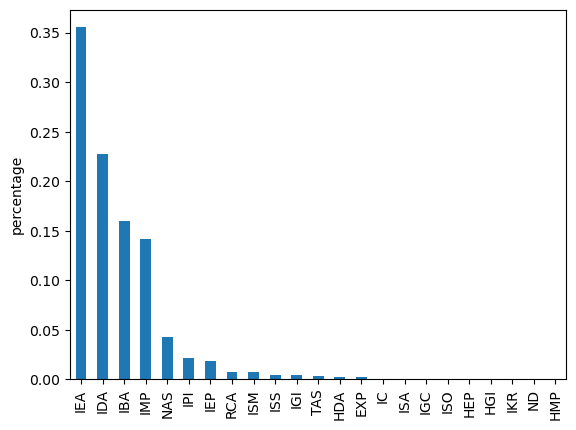

In [58]:
# filter/analyze evidence codes
g = go_annotations_ecoli.evidence_code.value_counts(normalize=True).plot.bar()
g.set_ylabel("percentage")


In [59]:
go_annotations_ecoli = (
    go_annotations_ecoli[go_annotations_ecoli.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005575
1,A5A615,located_in,C,GO:0110165
2,A5A615,located_in,C,GO:0005886
3,A5A615,located_in,C,GO:0016020
4,A5A616,acts_upstream_of_or_within,P,GO:0031668
...,...,...,...,...
138480,Q93K97,is_active_in,C,GO:0110165
138481,Q93K97,is_active_in,C,GO:0005829
138482,Q93K97,located_in,C,GO:0005575
138483,Q93K97,located_in,C,GO:0110165


In [60]:
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.str.startswith("NOT")
].reset_index(drop=True)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005575
1,A5A615,located_in,C,GO:0110165
2,A5A615,located_in,C,GO:0005886
3,A5A615,located_in,C,GO:0016020
4,A5A616,acts_upstream_of_or_within,P,GO:0031668
...,...,...,...,...
138361,Q93K97,is_active_in,C,GO:0110165
138362,Q93K97,is_active_in,C,GO:0005829
138363,Q93K97,located_in,C,GO:0005575
138364,Q93K97,located_in,C,GO:0110165


What qualifiers are assigned to the individual aspects?

- Looks good, we can filter later

In [61]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in          11217
is_active_in         3364
part_of              2683
colocalizes_with        7
### P
acts_upstream_of_or_within    49569
involved_in                   41647
acts_upstream_of                  8
### F
enables           29318
contributes_to      553


Here, we remove some of the less common and less accurate qualifiers. This did not seem to have a major impact on the final results and conclusions.

In [62]:
go_annotations_ecoli = go_annotations_ecoli[~go_annotations_ecoli.qualifier.isin(["contributes_to", "colocalizes_with", "acts_upstream_of"])]
go_annotations_ecoli.qualifier.value_counts()

acts_upstream_of_or_within                        49569
involved_in                                       41647
enables                                           29318
located_in                                        11217
is_active_in                                       3364
part_of                                            2683
acts_upstream_of_positive_effect                      0
NOT|acts_upstream_of                                  0
NOT|acts_upstream_of_or_within_negative_effect        0
acts_upstream_of_or_within_negative_effect            0
acts_upstream_of_negative_effect                      0
NOT|part_of                                           0
NOT|contributes_to                                    0
NOT|colocalizes_with                                  0
acts_upstream_of                                      0
acts_upstream_of_or_within_positive_effect            0
NOT|acts_upstream_of_or_within                        0
NOT|enables                                     

Annotating the dataset with labels of GO terms:

In [63]:
go_annotations_ecoli = go_annotations_ecoli.assign(
    go_term=go_annotations_ecoli.go_id.map(go_owl.get_label)
)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id,go_term
0,A5A615,located_in,C,GO:0005575,cellular_component
1,A5A615,located_in,C,GO:0110165,cellular anatomical entity
2,A5A615,located_in,C,GO:0005886,plasma membrane
3,A5A615,located_in,C,GO:0016020,membrane
4,A5A616,acts_upstream_of_or_within,P,GO:0031668,cellular response to extracellular stimulus
...,...,...,...,...,...
138361,Q93K97,is_active_in,C,GO:0110165,cellular anatomical entity
138362,Q93K97,is_active_in,C,GO:0005829,cytosol
138363,Q93K97,located_in,C,GO:0005575,cellular_component
138364,Q93K97,located_in,C,GO:0110165,cellular anatomical entity


In [64]:
tmp = go_annotations_ecoli.drop("qualifier", axis=1).melt(
    id_vars=["Uniprot", "aspect"], value_vars=["go_id", "go_term"]
)
tmp = tmp[tmp.variable == "go_term"].drop_duplicates().reset_index(drop=True)
go_mf = (
    tmp[tmp.aspect == "F"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_bp = (
    tmp[tmp.aspect == "P"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_cc = (
    tmp[tmp.aspect == "C"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
del tmp
go_mf


[('A5A627', 'inorganic molecular entity transmembrane transporter activity'),
 ('A5A627', 'transporter activity'),
 ('A5A627', 'passive transmembrane transporter activity'),
 ('A5A627', 'anion transmembrane transporter activity'),
 ('A5A627', 'inorganic anion transmembrane transporter activity'),
 ('A5A627', 'anion channel activity'),
 ('A5A627', 'ion transmembrane transporter activity'),
 ('A5A627', 'transmembrane transporter activity'),
 ('A5A627', 'ion channel activity'),
 ('A5A627', 'molecular_function'),
 ('A5A627', 'channel activity'),
 ('C1P5Z7', 'molecular function inhibitor activity'),
 ('C1P5Z7', 'enzyme inhibitor activity'),
 ('C1P5Z7', 'molecular_function'),
 ('C1P5Z7', 'molecular function regulator activity'),
 ('C1P5Z7', 'enzyme regulator activity'),
 ('O32583', 'molecular_function'),
 ('O32583', 'sulfur carrier activity'),
 ('O32583', 'molecular carrier activity'),
 ('P00350',
  'oxidoreductase activity, acting on the CH-OH group of donors, NAD or NADP as acceptor'),
 ('

### Keywords

In [65]:
keywords_uniprot = load_df("keywords")
keywords_ecoli = (
    keywords_uniprot[keywords_uniprot.Uniprot.isin(sequences_all.index)]
    .drop_duplicates()
    .reset_index(drop=True)
)
keywords_ecoli

,Uniprot,keyword
0,P00509,3D-structure
1,P00509,Aminotransferase
2,P00509,Cytoplasm
3,P00509,Direct protein sequencing
4,P00509,Pyridoxal phosphate
...,...,...
23130,P0AEG8,Reference proteome
23131,P33668,Reference proteome
23132,P33668,Signal
23133,A0A0A6YVN8,3D-structure


### Interpro

In [66]:
interpro_all = load_df("interpro")
interpro_ecoli = interpro_all[
    interpro_all.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)
interpro_ecoli


,Uniprot,interpro_id
0,P00509,IPR004839
1,P00509,IPR000796
2,P00509,IPR004838
3,P00509,IPR015424
4,P00509,IPR015421
...,...,...
12755,P77296,IPR011990
12756,P0AEG8,IPR019717
12757,P33668,IPR028921
12758,A0A0A6YVN8,IPR036237


### TCDB

In [67]:
tcdb_all = load_df("tcdb_substrates")
tcdb_ecoli = (
    tcdb_all[
        (tcdb_all.variable == "Uniprot") & (tcdb_all.value.isin(sequences_all.index))
    ]
    .drop_duplicates()
    .reset_index(drop=True)
    .drop("variable", axis=1)
    .rename(columns={"value": "Uniprot"})[["Uniprot", "tcdb_id"]]
)
tcdb_ecoli


,Uniprot,tcdb_id
0,P00803,9.B.391.1.3
1,P02916,3.A.1.1.1
2,P02925,3.A.1.2.1
3,P02929,2.C.1.1.1
4,P03959,3.A.3.7.1
...,...,...
702,Q46909,2.A.1.1.95
703,P28303,2.A.66.1.4
704,C1P611,1.C.135.1.1
705,P23481,3.D.1.9.1


### Combined annotation dataset

In [68]:
# go_annotations_ecoli[go_annotations_ecoli.aspect == "C"].drop(
#     ["qualifier", "aspect"], axis=1
# ).melt(id_vars="Uniprot", value_vars=["go_id", "go_term"])
# TODO split by aspect
go_annotations_ecoli
keywords_ecoli
# TODO TCDB class, subclass
tcdb_ecoli
interpro_ecoli
# TODO chebi
# TODO chebi ancestors?


,Uniprot,interpro_id
0,P00509,IPR004839
1,P00509,IPR000796
2,P00509,IPR004838
3,P00509,IPR015424
4,P00509,IPR015421
...,...,...
12755,P77296,IPR011990
12756,P0AEG8,IPR019717
12757,P33668,IPR028921
12758,A0A0A6YVN8,IPR036237


## Clustering analysis

- Use KMeans etc. to cluster feature data
- Find GO terms etc. that match clusters most closely.

In [69]:
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


### Kmeans

#### What is the optimal number *k* of clusters?

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

def cluster_plots(feature_data, min_clusters: int = 2, max_clusters: int = 20):
    """
    Feature_data is a pandas dataframe with features as columns and samples as rows.  
    - Elbow plot/Inertia: the more it looks like an elbow, the better. the optimal number of clusters is at the "joint of the arm"
    - Silhouette: Number between -1 and 1. The higher the better. Measures tightness/overlap of clusters
    - CH: Higher score is better
    - DB: The closer to 0 the better. Average similarity between any cluster and its closest cluster.
    """
    scores = list()

    for n_clusters in range(min_clusters, max_clusters + 1):
        pipe = make_pipeline(
            StandardScaler(), KMeans(n_clusters=n_clusters, random_state=0)
        )
        pipe.fit(feature_data)
        scores.append([n_clusters, "Inertia", pipe["kmeans"].inertia_])
        scores.append(
            [
                n_clusters,
                "Silhouette Coefficient",
                silhouette_score(feature_data, pipe["kmeans"].labels_),
            ]
        )
        scores.append(
            [
                n_clusters,
                "Calinski Harabasz Index",
                calinski_harabasz_score(feature_data, pipe["kmeans"].labels_),
            ]
        )
        scores.append(
            [
                n_clusters,
                "Davies Bouldin Index",
                davies_bouldin_score(feature_data, pipe["kmeans"].labels_),
            ]
        )

    scores_wide = pd.DataFrame.from_records(scores, columns=["k", "metric", "score"]).pivot(
        index="k", columns="metric", values="score"
    )
    return scores_wide.plot(subplots=True, layout=(2,2), figsize=(15,10), xticks=scores_wide.index)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

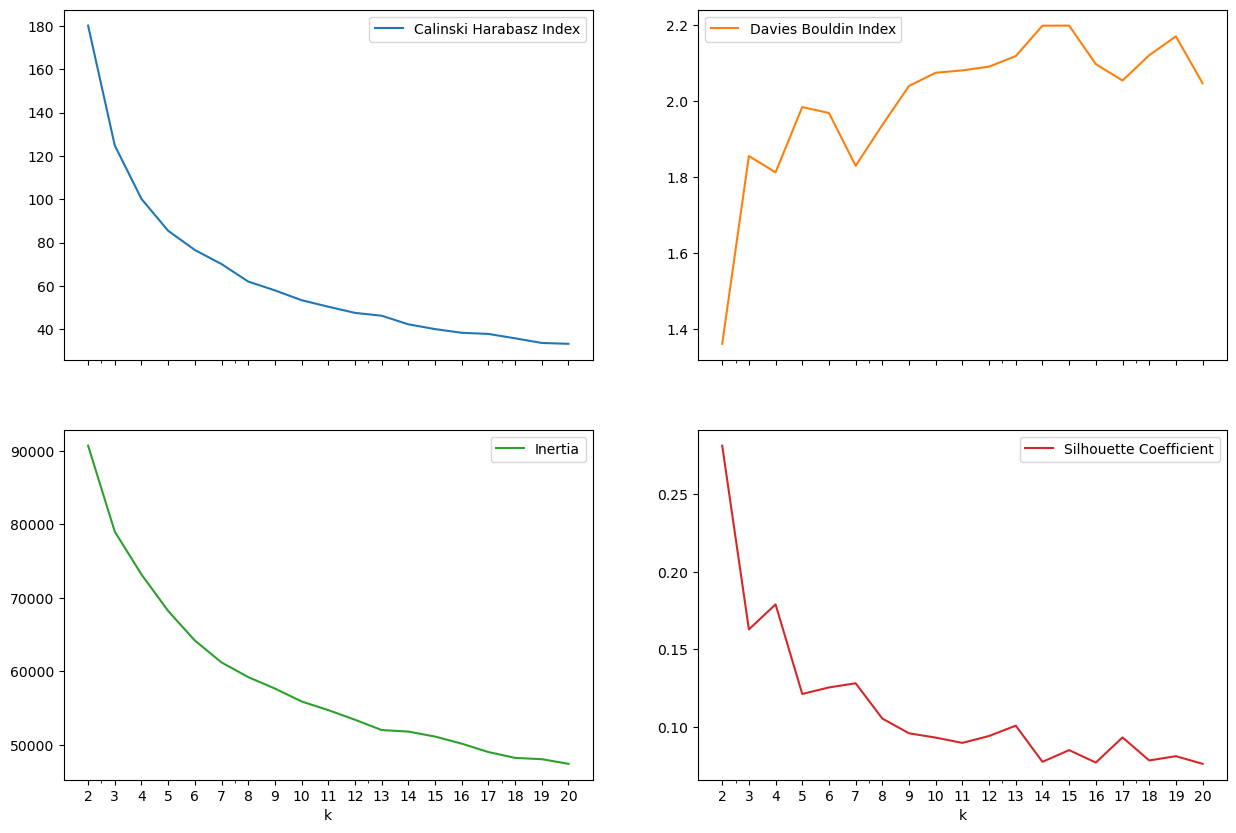

In [71]:
cluster_plots(feature_pssm)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

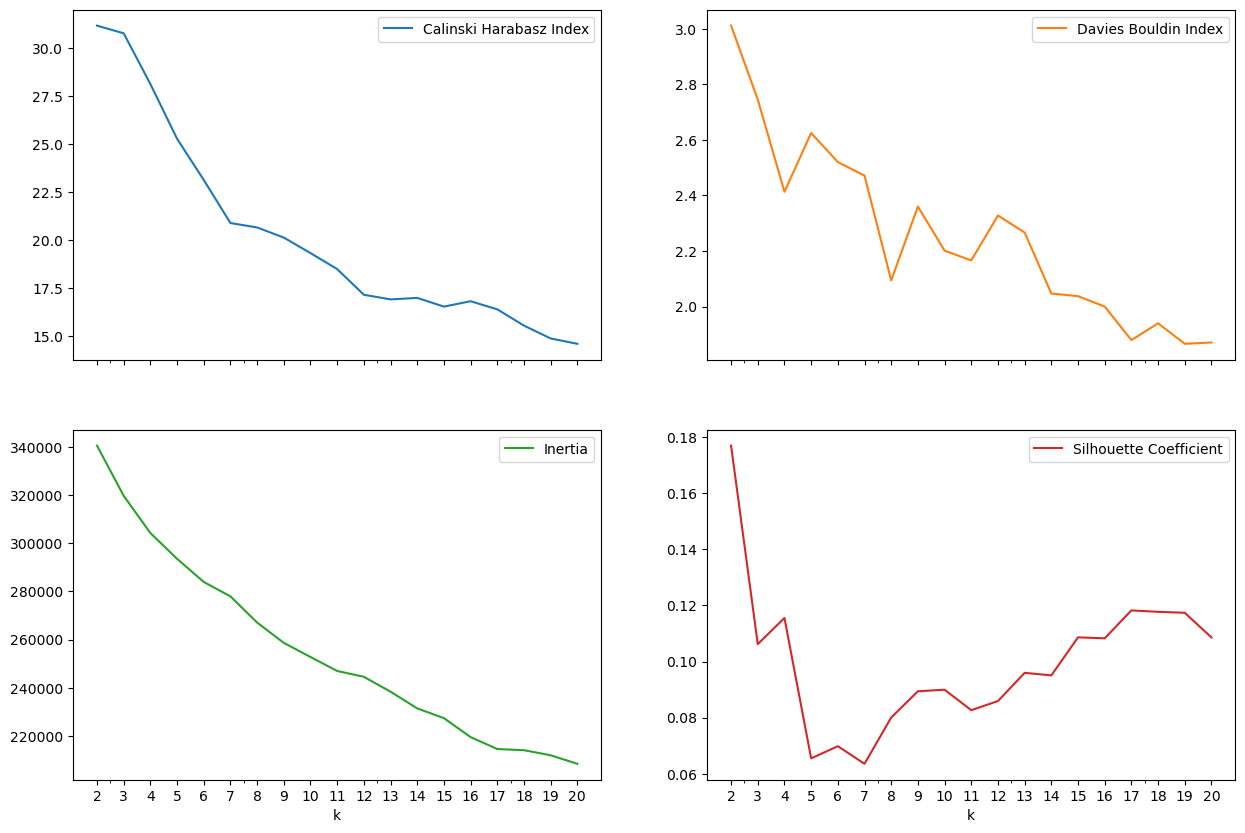

In [72]:
cluster_plots(feature_protnlm)

It actually looks like PSSM works better! But none of the metrics look particularly good, we should look at a dendrogram.

### Hierarchical clustering using PSSMs

We will try hierarchical clustering first in order to find good annotations to create clusters, then try KMeans again. The clustering looks better when using PSSM instead of embeddings.

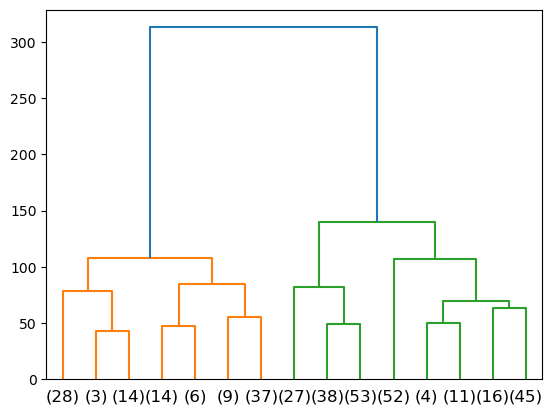

In [86]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale

linkage = hierarchy.linkage(scale(feature_pssm), method="ward", metric="euclidean")
dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=15)


#### Analyzing the two clusters

It seems like there are two very obvious clusters. What are they?

In [74]:
labels = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
labels = pd.Series(data=labels, index=feature_pssm.index)
labels

P02916    2
P03959    2
P05825    1
P0AA78    2
P0AAD6    2
         ..
P77328    2
P76198    2
P33011    2
P37327    2
P39282    2
Length: 357, dtype: int32

In [75]:
labels.value_counts()

2    246
1    111
dtype: int64

In [76]:
# protein sets (accessions)
label1 = set(labels[labels == 1].index.tolist())
label2 = set(labels[labels == 2].index.tolist())
print(len(label1), len(label2))

111 246


#### Enrichment analysis

In [77]:
# Takes a protein set a sub-set and calculates scores.
from scipy.stats import hypergeom, rankdata
import numpy as np


def enrichment_analysis(
    proteins_reference: set,
    proteins_subset: set,
    annotations: list,
    p_cutoff: float = None,
    min_lfc: float = None,
) -> pd.DataFrame:
    assert len(proteins_reference) > 0 and len(proteins_subset) > 0, "set was empty"
    assert all(
        protein in proteins_reference for protein in proteins_subset
    ), "a protein in the subset was not in the reference set."

    annotations_df = pd.DataFrame.from_records(
        annotations, columns=["identifier", "annotation"]
    )
    annotations_reference = annotations_df[
        annotations_df.identifier.isin(proteins_reference)
    ]
    annotations_subset = annotations_df[annotations_df.identifier.isin(proteins_subset)]

    annotation_scores = []
    for annotation in annotations_subset.annotation.unique():
        total_reference = len(proteins_reference)
        annotated_reference = (
            annotations_reference[annotations_reference.annotation == annotation]
            .identifier.unique()
            .shape[0]
        )
        total_subset = len(proteins_subset)
        annotated_subset = (
            annotations_subset[annotations_subset.annotation == annotation]
            .identifier.unique()
            .shape[0]
        )
        expected = (annotated_reference / total_reference) * total_subset
        fold_change = np.log2(annotated_subset / expected)

        # Scipy naming convention, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html
        # Normal convention: N, K, n, k
        # M proteins in the reference set (i.e. genome)
        M = total_reference
        # n of those are annotated with the annotation
        n = annotated_reference
        # we draw N proteins from M
        N = total_subset
        # k of those are annotated with the annotation
        k = annotated_subset
        # The cumulative distribution function (cdf) gives the probability of drawing k or fewer than k annotated proteins.
        # The cdf is the sum of the probability mass function for all values <=k.
        # The survival function sf is defined 1-cdf and is therefore the probability of getting more than k values.
        # Since we want the probability for k or more values, we have to calculate the sf at k-1.
        p_val = hypergeom.sf(k - 1, M, n, N)

        annotation_scores.append(
            [
                annotation,
                total_reference,
                annotated_reference,
                total_subset,
                annotated_subset,
                expected,
                fold_change,
                p_val,
            ]
        )
    annotation_scores = pd.DataFrame.from_records(
        annotation_scores,
        columns=[
            "annotation",
            "total_reference",
            "annotated_reference",
            "total_subset",
            "annotated_subset",
            "expected",
            "lfc",
            "p",
        ],
    )

    annotation_scores["p_fdr"] = (
        annotation_scores.p * len(annotation_scores.p) / rankdata(annotation_scores.p)
    )
    annotation_scores.p_fdr = annotation_scores.p_fdr.clip(upper=1.0)
    # p_fdr[p_fdr > 1] = 1.0
    #  = p_fdr

    annotation_scores["p_bonferroni"] = annotation_scores.p.transform(
        lambda p: min(p * annotation_scores.shape[0], 1.0)
    )
    annotation_scores = annotation_scores.sort_values(["p", "lfc"])

    if p_cutoff:
        annotation_scores = annotation_scores[annotation_scores.p_fdr <= p_cutoff]

    if min_lfc:
        annotation_scores = annotation_scores[annotation_scores.lfc >= min_lfc]

    return annotation_scores


Keywords

In [78]:
keywords = list(keywords_ecoli.to_records(index=False))

enrichment_analysis(
    proteins_reference=set(sequences.index.unique().to_list()),
    # proteins_reference=set(sequences_all.index.unique().to_list()),
    proteins_subset=label1,
    annotations=keywords,
    p_cutoff=0.05,
    min_lfc=1,
)


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
8,Signal,357,46,111,38,14.302521,1.409730,1.026404e-14,9.853483e-13,9.853483e-13
16,Direct protein sequencing,357,55,111,37,17.100840,1.113458,1.681339e-09,8.070427e-08,1.614085e-07
1,Cell outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
11,Transmembrane beta strand,357,27,111,23,8.394958,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
56,Periplasm,357,10,111,9,3.109244,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
60,Disulfide bond,357,10,111,9,3.109244,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
9,TonB box,357,6,111,6,1.865546,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
94,Fimbrium biogenesis,357,6,111,6,1.865546,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
6,Receptor,357,7,111,6,2.176471,1.462972,4.275824e-03,3.731628e-02,4.104791e-01


In [79]:
enrichment_analysis(
    proteins_reference=set(sequences.index.unique().to_list()),
    # proteins_reference=set(sequences_all.index.unique().to_list()),
    proteins_subset=label2,
    annotations=keywords,
    p_cutoff=0.05,
    # min_lfc=1
)


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
7,Transmembrane helix,357,268,246,215,184.672269,0.219369,7.861795e-15,8.883828e-13,8.883828e-13
2,Cell membrane,357,304,246,228,209.478992,0.122228,1.236558e-08,6.986555e-07,1.397311e-06
1,Cell inner membrane,357,302,246,226,208.100840,0.119040,5.559409e-08,2.094044e-06,6.282133e-06
6,Transmembrane,357,295,246,219,203.277311,0.107482,4.322393e-06,1.221076e-04,4.884304e-04
14,Symport,357,51,246,45,35.142857,0.356694,5.692928e-04,1.286602e-02,6.433009e-02
29,Antiport,357,19,246,19,13.092437,0.537266,6.745755e-04,1.270451e-02,7.622703e-02


Gene ontology


In [80]:
for cluster_name, cluster_set in {"cluster1": label1, "cluster2":label2}.items():
    print("#"*20)
    print(cluster_name)
    print("#"*20)
    for dataset_name, go_dataset in {"cc": go_cc, "mf":go_mf, "bp":go_bp, "keywords": keywords}.items():
        print(f"Annotation: {dataset_name}")
        res = enrichment_analysis(
            proteins_reference=set(sequences.index.unique().to_list()),
            # proteins_reference=set(sequences_all.index.unique().to_list()),
            proteins_subset=cluster_set,
            annotations=go_dataset,
            p_cutoff=0.05,
            # min_lfc=1
        )
        display(res)

####################
cluster1
####################
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
9,outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
10,cell outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
11,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
12,periplasmic space,357,16,111,14,4.974790,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
7,protein-containing complex,357,155,111,63,48.193277,0.386520,4.930142e-04,6.507788e-03,3.253894e-02
4,membrane protein complex,357,147,111,60,45.705882,0.392583,7.039776e-04,7.743754e-03,4.646252e-02


Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
31,binding,357,119,111,59,37.000000,0.673190,1.321832e-07,0.000037,0.000037
45,wide pore channel activity,357,19,111,15,5.907563,1.344327,1.399789e-05,0.001579,0.003947
46,porin activity,357,19,111,15,5.907563,1.344327,1.399789e-05,0.001579,0.003947
2,passive transmembrane transporter activity,357,44,111,26,13.680672,0.926372,3.727963e-05,0.002336,0.010513
10,channel activity,357,44,111,26,13.680672,0.926372,3.727963e-05,0.002336,0.010513
38,protein binding,357,77,111,38,23.941176,0.666505,1.158074e-04,0.005443,0.032658
48,identical protein binding,357,27,111,17,8.394958,1.017940,3.837330e-04,0.015459,0.108213
75,siderophore uptake transmembrane transporter a...,357,6,111,6,1.865546,1.685364,8.214637e-04,0.027253,0.231653
228,fimbrial usher porin activity,357,6,111,6,1.865546,1.685364,8.214637e-04,0.027253,0.231653
23,heterocyclic compound binding,357,38,111,21,11.815126,0.829754,9.280026e-04,0.024923,0.261697


Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
8,Signal,357,46,111,38,14.302521,1.409730,1.026404e-14,9.853483e-13,9.853483e-13
16,Direct protein sequencing,357,55,111,37,17.100840,1.113458,1.681339e-09,8.070427e-08,1.614085e-07
1,Cell outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
11,Transmembrane beta strand,357,27,111,23,8.394958,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
0,3D-structure,357,116,111,58,36.067227,0.685364,1.242733e-07,2.386048e-06,1.193024e-05
56,Periplasm,357,10,111,9,3.109244,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
60,Disulfide bond,357,10,111,9,3.109244,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
9,TonB box,357,6,111,6,1.865546,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
94,Fimbrium biogenesis,357,6,111,6,1.865546,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
19,Translocase,357,37,111,20,11.504202,0.797839,1.844908e-03,1.771112e-02,1.771112e-01


####################
cluster2
####################
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
2,plasma membrane,357,285,246,222,196.386555,0.176864,2.190972e-12,1.424132e-10,1.424132e-10
3,membrane,357,316,246,228,217.747899,0.066375,3.653903e-04,1.187518e-02,2.375037e-02


Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
23,secondary active transmembrane transporter act...,357,88,246,76,60.638655,0.325762,0.000017,0.006927,0.006927


Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
7,Transmembrane helix,357,268,246,215,184.672269,0.219369,7.861795e-15,8.883828e-13,8.883828e-13
2,Cell membrane,357,304,246,228,209.478992,0.122228,1.236558e-08,6.986555e-07,1.397311e-06
1,Cell inner membrane,357,302,246,226,208.100840,0.119040,5.559409e-08,2.094044e-06,6.282133e-06
6,Transmembrane,357,295,246,219,203.277311,0.107482,4.322393e-06,1.221076e-04,4.884304e-04
14,Symport,357,51,246,45,35.142857,0.356694,5.692928e-04,1.286602e-02,6.433009e-02
29,Antiport,357,19,246,19,13.092437,0.537266,6.745755e-04,1.270451e-02,7.622703e-02


#### Subclusters

In [81]:
pssm_label1 = feature_pssm.loc[labels[labels == 1].index.tolist()]
pssm_label2 = feature_pssm.loc[labels[labels == 2].index.tolist()]

##### Left cluster

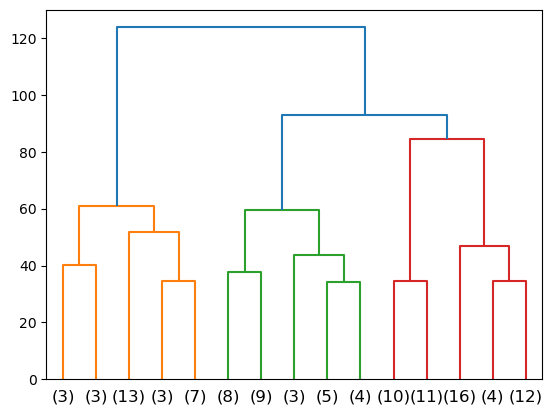

In [82]:
linkage = hierarchy.linkage(scale(pssm_label1), method="ward")
dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=15)

In [83]:
sublabels = hierarchy.fcluster(linkage, criterion="maxclust", t=3)
sublabels = pd.Series(data=sublabels, index=pssm_label1.index)
sublabels


P05825    2
P0AAH0    3
P0AER0    3
P0AFY6    1
P0C0S1    3
         ..
P75857    2
P76128    2
P42915    2
P39352    3
P33913    2
Length: 111, dtype: int32

In [84]:
for cluster_name, cluster_set in {f"cluster{i}": set(sublabels[sublabels == i].index.tolist()) for i in sublabels.unique()}.items():
    print("#"*20)
    print(cluster_name)
    print("#"*20)
    for dataset_name, go_dataset in {"cc": go_cc, "mf":go_mf, "bp":go_bp, "keywords": keywords}.items():
        print(f"Annotation: {dataset_name}")
        res = enrichment_analysis(
            proteins_reference=set(sublabels.index.unique().tolist()),
            # proteins_reference=set(sequences_all.index.unique().to_list()),
            proteins_subset=cluster_set,
            annotations=go_dataset,
            p_cutoff=0.05,
            # min_lfc=1
        )
        display(res)

####################
cluster2
####################
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
0,outer membrane,111,23,29,19,6.009009,1.660800,9.774054e-11,1.433528e-09,2.150292e-09
2,cell outer membrane,111,23,29,19,6.009009,1.660800,9.774054e-11,1.433528e-09,2.150292e-09
5,outer membrane-bounded periplasmic space,111,14,29,11,3.657658,1.588512,1.542102e-05,9.693211e-05,3.392624e-04
6,periplasmic space,111,14,29,11,3.657658,1.588512,1.542102e-05,9.693211e-05,3.392624e-04


Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
16,wide pore channel activity,111,15,29,12,3.918919,1.614507,0.000004,0.000192,0.000288
17,porin activity,111,15,29,12,3.918919,1.614507,0.000004,0.000192,0.000288
27,peptide transmembrane transporter activity,111,13,29,10,3.396396,1.557923,0.000063,0.001702,0.005106
26,amide transmembrane transporter activity,111,14,29,10,3.657658,1.451008,0.000182,0.003687,0.014747
20,siderophore uptake transmembrane transporter a...,111,6,29,6,1.567568,1.936435,0.000210,0.002832,0.016993
21,siderophore-iron transmembrane transporter act...,111,6,29,6,1.567568,1.936435,0.000210,0.002832,0.016993
71,fimbrial usher porin activity,111,6,29,6,1.567568,1.936435,0.000210,0.002832,0.016993
2,passive transmembrane transporter activity,111,26,29,13,6.792793,0.936435,0.002446,0.023304,0.198086
7,channel activity,111,26,29,13,6.792793,0.936435,0.002446,0.023304,0.198086


Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
59,peptide transport,111,14,29,10,3.657658,1.451008,0.000182,0.031680,0.031680
121,pilus assembly,111,6,29,6,1.567568,1.936435,0.000210,0.010430,0.036504
122,cell projection assembly,111,6,29,6,1.567568,1.936435,0.000210,0.010430,0.036504
123,cell projection organization,111,6,29,6,1.567568,1.936435,0.000210,0.010430,0.036504
124,pilus organization,111,6,29,6,1.567568,1.936435,0.000210,0.010430,0.036504
62,amide transport,111,15,29,10,3.918919,1.351472,0.000450,0.013052,0.078313
22,siderophore transport,111,5,29,5,1.306306,1.936435,0.000927,0.023032,0.161225
24,iron ion transport,111,9,29,7,2.351351,1.573865,0.001097,0.021217,0.190952
26,iron coordination entity transport,111,9,29,7,2.351351,1.573865,0.001097,0.021217,0.190952
125,cellular component assembly,111,9,29,7,2.351351,1.573865,0.001097,0.021217,0.190952


Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
8,Signal,111,38,29,29,9.927928,1.546488,3.886363e-19,1.360227e-17,1.360227e-17
1,Cell outer membrane,111,23,29,20,6.009009,1.734801,2.451501e-12,3.432101e-11,8.580252e-11
11,Transmembrane beta strand,111,23,29,20,6.009009,1.734801,2.451501e-12,3.432101e-11,8.580252e-11
17,Disulfide bond,111,9,29,9,2.351351,1.936435,1.981978e-06,1.734231e-05,6.936922e-05
15,Periplasm,111,9,29,8,2.351351,1.766510,7.163434e-05,5.014404e-04,2.507202e-03
6,Receptor,111,6,29,6,1.567568,1.936435,2.097920e-04,1.048960e-03,7.342718e-03
9,TonB box,111,6,29,6,1.567568,1.936435,2.097920e-04,1.048960e-03,7.342718e-03
34,Fimbrium biogenesis,111,6,29,6,1.567568,1.936435,2.097920e-04,1.048960e-03,7.342718e-03
4,Iron transport,111,5,29,5,1.306306,1.936435,9.265811e-04,3.603371e-03,3.243034e-02
3,Iron,111,7,29,5,1.828829,1.451008,1.280480e-02,4.481681e-02,4.481681e-01


####################
cluster3
####################
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
17,anion binding,111,19,53,18,9.072072,0.988493,0.000003,0.000710,0.000710
19,nucleoside phosphate binding,111,18,53,17,8.594595,0.984033,0.000008,0.000697,0.001743
20,nucleotide binding,111,18,53,17,8.594595,0.984033,0.000008,0.000697,0.001743
39,purine ribonucleotide binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194
40,adenyl nucleotide binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194
41,ATP binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194
42,purine ribonucleoside triphosphate binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194
43,ribonucleotide binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194
44,adenyl ribonucleotide binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194
45,purine nucleotide binding,111,17,53,16,8.117117,0.979033,0.000020,0.000599,0.004194


Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
1,Cell inner membrane,111,76,53,50,36.288288,0.462424,6.007894e-09,2.683526e-07,4.025289e-07
2,Cell membrane,111,76,53,50,36.288288,0.462424,6.007894e-09,2.683526e-07,4.025289e-07
0,ATP-binding,111,21,53,19,10.027027,0.922106,8.990853e-06,1.721106e-04,6.023872e-04
5,Nucleotide-binding,111,21,53,19,10.027027,0.922106,8.990853e-06,1.721106e-04,6.023872e-04
39,Amino-acid transport,111,11,53,10,5.252252,0.928992,2.550867e-03,3.418161e-02,1.709081e-01


####################
cluster1
####################
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
2,plasma membrane,111,63,29,25,16.459459,0.603011,0.000129,0.004403,0.004403
3,membrane,111,88,29,29,22.990991,0.334984,0.000361,0.006131,0.012262
12,oxidoreductase complex,111,7,29,6,1.828829,1.714042,0.001193,0.013519,0.040556
15,catalytic complex,111,8,29,6,2.090090,1.521397,0.003873,0.032916,0.131665


Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
8,Transmembrane helix,111,53,29,22,13.846847,0.667946,0.000401,0.023672,0.023672


## Hierarchical clustering using Embeddings

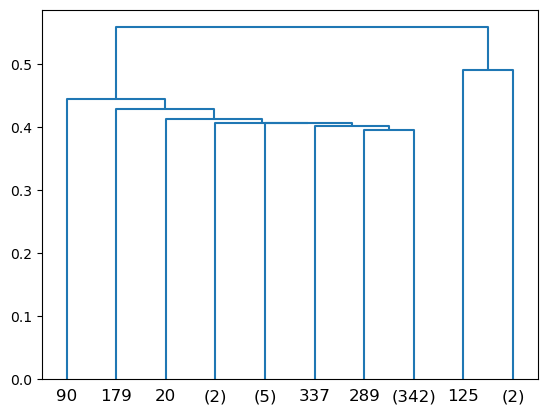

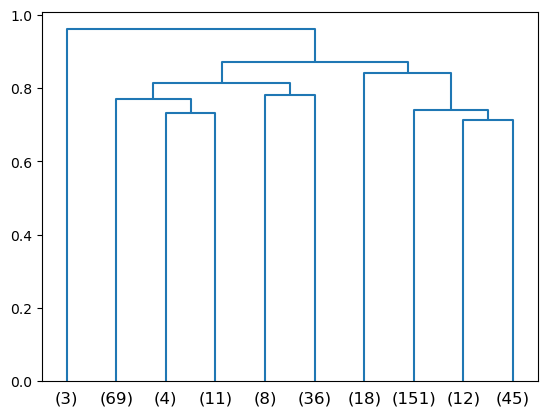

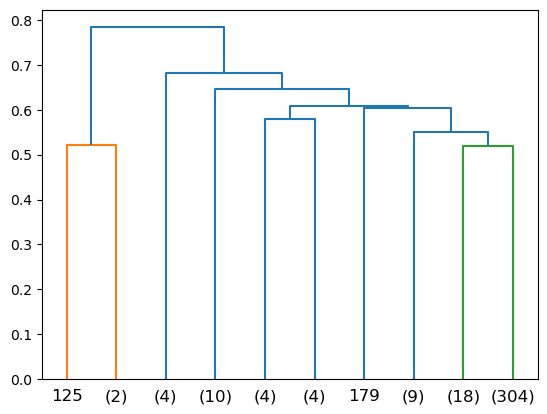

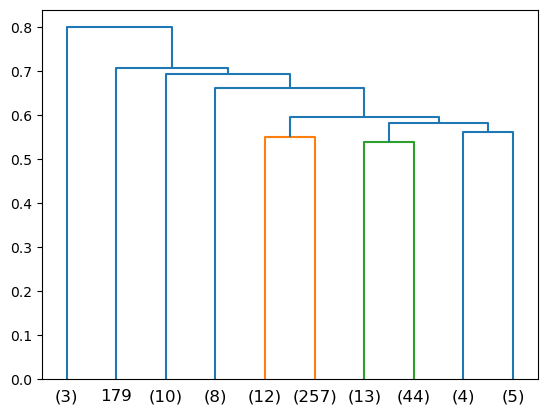

In [110]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

    linkage = hierarchy.linkage(feature_protnlm, method=method, metric="cosine")
    dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=10)
    plt.show()

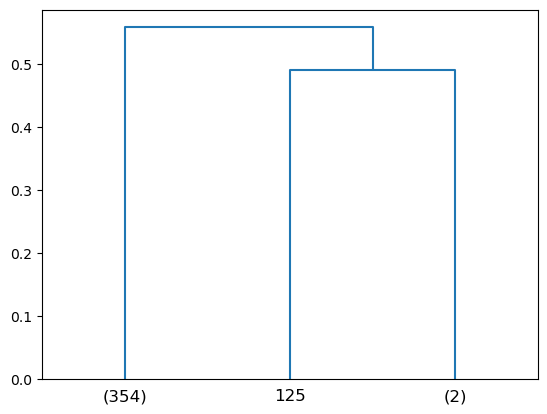

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P37636,mdtE yhiU b3513 JW3481,Multidrug resistance protein MdtE,True,1,MNRRRKLLIPLLFCGAMLTACDDKSAENAAAMTPEVGVVTLSPGSV...,83333
P77747,ompN ynaG b1377 JW1371,Outer membrane porin N (Outer membrane protein...,True,1,MKSKVLALLIPALLAAGAAHAAEVYNKDGNKLDLYGKVDGLHYFSD...,83333


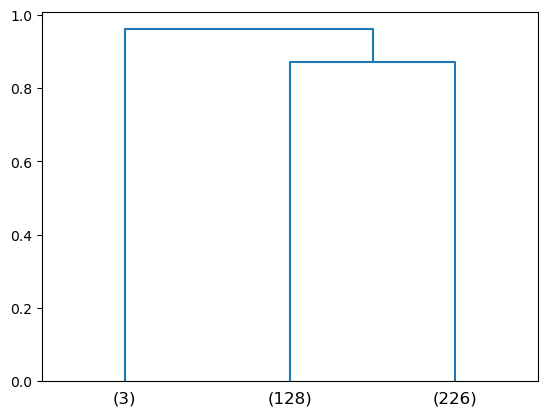

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0ABI4,corA b3816 JW3789,Magnesium transport protein CorA,True,1,MLSAFQLENNRLTRLEVEESQPLVNAVWIDLVEPDDDERLRVQSEL...,83333
P0ADL1,nepI yicM b3662 JW5938,Purine ribonucleoside efflux pump NepI (Nucleo...,True,1,MSEFIAENRGADAITRPNWSAVFSVAFCVACLIIVEFLPVSLLTPM...,83333
P10906,ugpE b3451 JW3416,sn-glycerol-3-phosphate transport system perme...,True,1,MIENRPWLTIFSHTMLILGIAVILFPLYVAFVAATLDKQAVYAAPM...,83333
P14176,proW b2678 JW2653,Glycine betaine/proline betaine transport syst...,True,1,MADQNNPWDTTPAADSAAQSADAWGTPTTAPTDGGGADWLTSTPAP...,83333
...,...,...,...,...,...,...
P77468,sfmD b0532 JW0521,Outer membrane usher protein SfmD,True,2,MKIPTTTDIPQRYTWCLAGICYSSLAILPSFLSYAESYFNPAFLLE...,83333
P45539,frlA yhfM b3370 JW3333,Probable fructoselysine/psicoselysine transpor...,True,2,MGSQELQRKLGFWAVLAIAVGTTVGSGIFVSVGEVAKAAGTPWLTV...,83333
P31060,modF ORF6 phrA b0760 JW0743,ABC transporter ATP-binding protein ModF (Phot...,True,2,MSSLQILQGTFRLSDTKTLQLPQLTLNAGDSWAFVGSNGSGKSALA...,83333
P39352,yjhB b4279 JW5768,Putative metabolite transport protein YjhB,True,1,MATAWYKQVNPPQRKALFSAWLGYVFDGFDFMMIFYILHIIKADLG...,83333


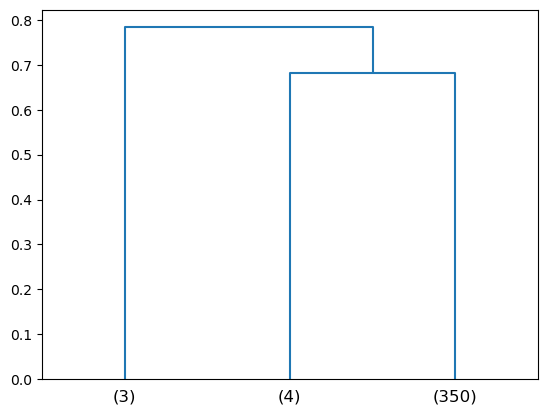

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P31547,metI yaeE b0198 JW0194,D-methionine transport system permease protein...,True,1,MSEPMMWLLVRGVWETLAMTFVSGFFGFVIGLPVGVLLYVTRPGQI...,83333
P0AAF1,potE b0692 JW0679,Putrescine transporter PotE (Putrescine-proton...,True,1,MSQAKSNKMGVVQLTILTMVNMMGSGIIMLPTKLAEVGTISIISWL...,83333
P76398,mdtB yegN b2075 JW2060,Multidrug resistance protein MdtB (Multidrug t...,True,1,MQVLPPSSTGGPSRLFIMRPVATTLLMVAILLAGIIGYRALPVSAL...,83333
P0AAF6,artP b0864 JW0848,Arginine transport ATP-binding protein ArtP (E...,True,1,MSIQLNGINCFYGAHQALFDITLDCPQGETLVLLGPSGAGKSSLLR...,83333


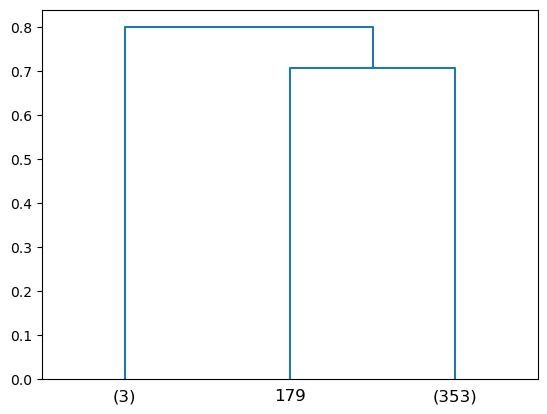

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333
P37327,yfdC b2347 JW2344,Inner membrane protein YfdC,True,1,MDNDKIDQHSDEIEVESEEKERGKKIEIDEDRLPSRAMAIHEHIRQ...,83333


In [125]:
n_clusters = 3
for method in ["single","complete","average","weighted"]:
    linkage = hierarchy.linkage(feature_protnlm, method=method, metric="cosine")
    dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=n_clusters) 
    # TODO ability to add protein names to plot?
    plt.show()
    labels = hierarchy.fcluster(linkage, criterion="maxclust", t=n_clusters)
    labels = pd.Series(data=labels, index=feature_pssm.index)
    display(sequences.loc[labels[labels==2].index])

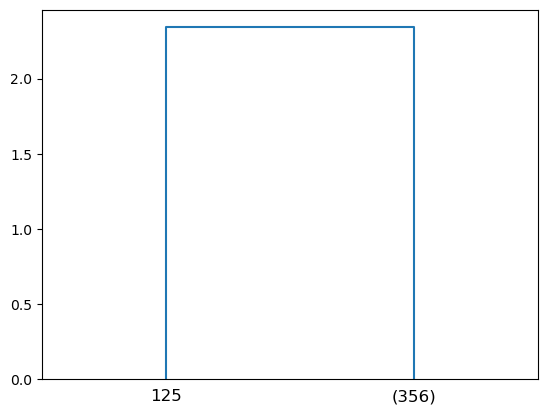

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0ABN9,dcuB genF b4123 JW4084,Anaerobic C4-dicarboxylate transporter DcuB,True,1,MLFTIQLIIILICLFYGARKGGIALGLLGGIGLVILVFVFHLQPGK...,83333


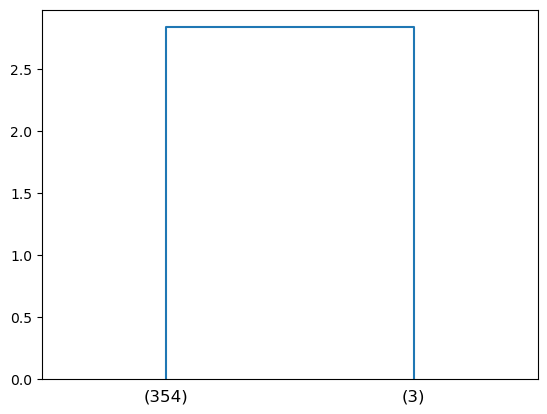

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0ABN9,dcuB genF b4123 JW4084,Anaerobic C4-dicarboxylate transporter DcuB,True,1,MLFTIQLIIILICLFYGARKGGIALGLLGGIGLVILVFVFHLQPGK...,83333
P37636,mdtE yhiU b3513 JW3481,Multidrug resistance protein MdtE,True,1,MNRRRKLLIPLLFCGAMLTACDDKSAENAAAMTPEVGVVTLSPGSV...,83333
P77747,ompN ynaG b1377 JW1371,Outer membrane porin N (Outer membrane protein...,True,1,MKSKVLALLIPALLAAGAAHAAEVYNKDGNKLDLYGKVDGLHYFSD...,83333


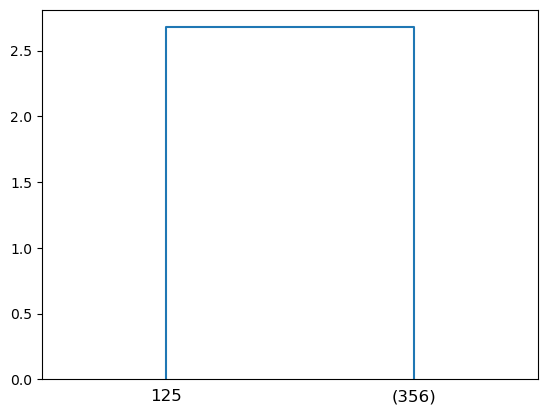

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0ABN9,dcuB genF b4123 JW4084,Anaerobic C4-dicarboxylate transporter DcuB,True,1,MLFTIQLIIILICLFYGARKGGIALGLLGGIGLVILVFVFHLQPGK...,83333


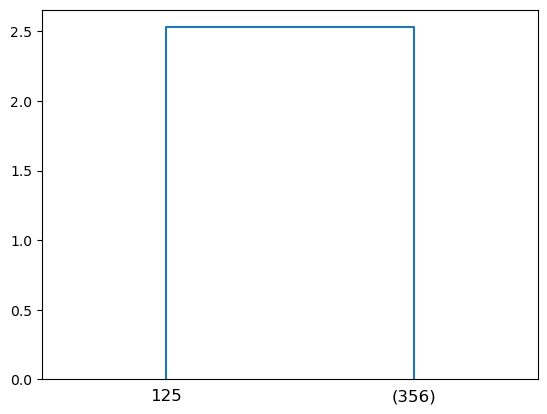

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0ABN9,dcuB genF b4123 JW4084,Anaerobic C4-dicarboxylate transporter DcuB,True,1,MLFTIQLIIILICLFYGARKGGIALGLLGGIGLVILVFVFHLQPGK...,83333


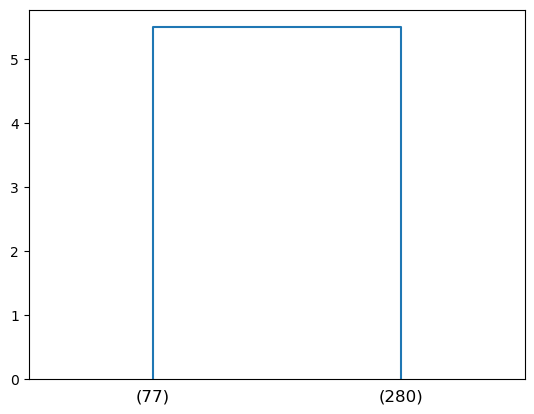

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333
P37327,yfdC b2347 JW2344,Inner membrane protein YfdC,True,1,MDNDKIDQHSDEIEVESEEKERGKKIEIDEDRLPSRAMAIHEHIRQ...,83333


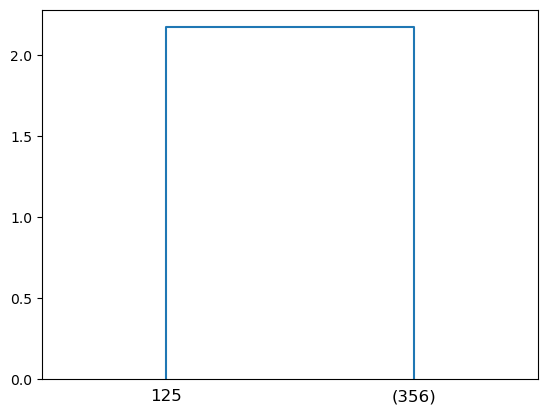

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0ABN9,dcuB genF b4123 JW4084,Anaerobic C4-dicarboxylate transporter DcuB,True,1,MLFTIQLIIILICLFYGARKGGIALGLLGGIGLVILVFVFHLQPGK...,83333


In [126]:
for method in ["single","complete","average","weighted","ward","median"]:
    linkage = hierarchy.linkage(feature_protnlm, method=method, metric="euclidean")
    dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=2)
    plt.show()
    labels = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
    labels = pd.Series(data=labels, index=feature_pssm.index)
    labels.value_counts()
    display(sequences.loc[labels[labels==2].index])

In [ ]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale

linkage = hierarchy.linkage(scale(feature_protnlm), method="complete", metric="cosine")
dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=15)

In [85]:
# TODO embeddings cosine distance beim clustering
# TODO try specialized R packages for GO enrichment and compare
# TODO analyze subclusters
# TODO compare features: different PSSMs, combined pssms, embeddings
# TODO turn double for loop into method!
# TODO turn code into py file!
    # Create dendrogram from feature df; and plot it (dataframe, )
    # Get the proteins in the clusters
    # Get enrichment for each cluster and each annotation dataset.
# TODO tcdb enrichment
# TODO rand metric?